In [2]:
import os
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
import seaborn as sns


# READING DATA

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
PATH = "C:\\Users\Cosas\OneDrive\Escritorio\Data_Science\proyectos\competiciones"
path = PATH + "\gender_submission.csv"

file_list = os.listdir(PATH) 
print(file_list)
valores_reales = pd.read_csv(path)
train = pd.read_csv(PATH + '\\train.csv')
test= pd.read_csv(PATH + '\\test.csv')
def irrelevantes():
    del(train["Cabin"])
    del(train['Name'])
    del(train['Ticket'])
    train = train.drop([61,829])
    del(test["Cabin"])
    del(test['Ticket'])
    del(test['Name'])
    test = test.drop([61,829])

#test.info()

['gender_submission.csv', 'resumen.csv', 'submission', 'submission.csv', 'submissionRFC.csv', 'submissionSVM.csv', 'submission_LogReg.csv', 'submission_LR.csv', 'submission_LRCV.csv', 'submission_LRN.csv', 'submission_MLP_probarr.csv', 'submission_RFC_hyperCV.csv', 'submission_RFC_hyperCV_.csv', 'submission_RFC_hyperCV_best.csv', 'submission_SVM_CV.csv', 'submission_SVM_CV_scale.csv', 'submission_SVM_sigmoid.csv', 'submission___RFC_CV.csv', 'submission_____RFC.csv', 'svm_c.csv', 'test.csv', 'train.csv']


# DATA CLEANING

In [306]:
train['Sex'].replace(['female', 'male'], [0,1], inplace=True)
test['Sex'].replace(['female', 'male'], [0,1], inplace=True)

train['Embarked'].replace(['Q','S', 'C'], [0,1,2], inplace=True)
test['Embarked'].replace(['Q','S', 'C'], [0,1,2], inplace=True)


nan_rows = train[train.isnull().any(1)]


#and fill the NA with the median age
median_age = train["Age"].median()
train.Age = train.Age.fillna(median_age)

#del(train["Cabin"])
del(train['Name'])
del(train['Ticket'])
train = train.drop([61,829])

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 69.5 KB


In [309]:
median_age = test["Age"].median()
test.Age = test.Age.fillna(median_age)

#Erasing the rows with NA values on Embarked
nan_rows = test[test.isnull().any(1)]

median_fare = test["Fare"].median()
test.Fare = test.Fare.fillna(median_fare)

#del(test["Cabin"])
#del(test['Ticket'])
#del(test['Name'])
#test = test.drop([61,829])

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


# USEFUL FUNCTIONS

In [310]:
def exito(x,y):
    total=0
    for i in range(len(x)):
        if x[i]==y[i]:
            total=total+1
    return(total/len(y_pred), total)

In [311]:
def submission_generator(prediccion, modelo):
    ids = X_test["PassengerId"]
    vivomuerto = pd.DataFrame(prediccion, columns=["SURVIVED"])
    submission = pd.concat([ids, vivomuerto], axis=1)
    submission.to_csv(PATH + '\\submission' + modelo + '.csv', index=False)

# DATA PARTITION

In [312]:
features = ["PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X_train = train[features]
y_train = train['Survived']
X_test = test
y_test = valores_reales["Survived"]
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (889, 8)
y_train : (889,)
X_test : (418, 8)
y_test : (418,)


# Random Forest Classifier MODEL

In [423]:
clf = RandomForestClassifier(n_estimators = 150, random_state=230) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred = np.array(y_pred)

In [424]:
RFC_points=exito(y_pred, y_test)[0]
K_RFC_points = 0.78708
matriz = confusion_matrix(y_test, y_pred)
print(matriz)
print(RFC_points)

[[235  31]
 [ 52 100]]
0.8014354066985646


In [344]:
submission_generator(y_pred, "_____RFC")

# Cross Validation

In [440]:
param_grid = {
                 'n_estimators': [100],
                 
             }
clf = RandomForestClassifier(random_state=15)
grid_clf = GridSearchCV(clf, param_grid, cv=10)
grid_clf.fit(X_train, y_train)
y_pred = grid_clf.predict(X_test)
RFC_CV_points = exito(y_pred, y_test)[0]
submission_generator(y_pred, '___RFC_CV')
K_RFC_CV_points = 0.77751
exito(y_pred, y_test)

(0.7583732057416268, 317)

## Hyperparameter tuning

In [433]:
random_grid2 = {'bootstrap': [True, False],
 'max_depth': [10, 40, 70,  100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200,400, 500, 800,1400]}
random_grid2

{'bootstrap': [True, False],
 'max_depth': [10, 40, 70, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 500, 800, 1400]}

In [291]:
%%time
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid2,
                               n_iter = 20, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
RandomForestClassifier(max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=500)
CPU times: total: 2.92 s
Wall time: 3min 37s


In [348]:
print(rf_random.best_estimator_)
print(rf_random.best_params_)
print(rf_random.best_score_)

RandomForestClassifier(max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=500)
{'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
0.8312819203268642


In [438]:
rfc = RandomForestClassifier(n_estimators = 200, max_depth=40, min_samples_split = 5, 
                            min_samples_leaf = 2, max_features = 'auto',
                            bootstrap = True,)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred = np.array(y_pred)

print(exito(y_pred, y_test))
RFC_HT_points = exito(y_pred, y_test)[0]
K_RFC_HT_points = 0.78947




(0.7942583732057417, 332)


# Mejores predicciones in Kaggle

n_estimators = 200, max_depth=40, min_samples_split = 5, 
min_samples_leaf = 2, max_features = 'auto',
bootstrap = True)

In [293]:
submission_generator(y_pred, "_RFC_hyperCV_")

In [ ]:
v = range(25,1000, 50)
probs = []
def precision_RFC():
    for i in range(0,(len(range(25,1000, 50)))):
        clf = RandomForestClassifier(n_estimators=v[i], random_state=100)
        n_estimators=v[i]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_pred = np.array(y_pred)
        value = exito(y_pred, y_test)[0]
        probs.append(value)
        print(probs)
precision_RFC()

# Support Vector Machines Classification MODEL

In [320]:
svc = svm.SVC(kernel="linear")
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
y_pred = y_pred.tolist()

In [321]:
print(svc.score(X_test,y_test))
matriz = confusion_matrix(y_test, y_pred)
print(matriz)
SVM_points = exito(y_pred, y_test)[0]


0.9880382775119617
[[266   0]
 [  5 147]]


In [51]:
submission_generator(y_pred, "_SVM_sigmoid")


# # Hyperparemeter tuning

In [29]:
param_grid = {
                'kernel': ['linear'],
               # 'C': [0.001, 0.01, 0.1, 1, 10, 100],
                'gamma' : ['scale', 'auto']
             }
param_grid

{'kernel': ['linear'], 'gamma': ['scale', 'auto']}

In [162]:
%%time

svc = svm.SVC()
print (np.mean(cross_val_score(clf, X_train, y_train, cv=5)))
grid_svc = GridSearchCV(svc, param_grid, cv=10, scoring='accuracy')
grid_svc.fit(X_train, y_train)

y_pred = grid_svc.predict(X_test)

print('Best score: {}'.format(grid_svc.best_score_))
print('Best parameters: {}'.format(grid_svc.best_params_))

Best score: 0.788508682328907
Best parameters: {'gamma': 'scale', 'kernel': 'linear'}
CPU times: total: 0 ns
Wall time: 0 ns


In [32]:
svc = svm.SVC(kernel = 'linear', gamma = 'scale')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(exito(y_pred, y_test))

(0.9880382775119617, 413)


In [161]:
submission_generator(y_pred, "_SVM_CV_scale")


In [27]:
exito(y_pred, y_test)

(0.9880382775119617, 413)

# Logistic Regression MODEL

In [69]:
escalar = StandardScaler()
X_train_sc = escalar.fit_transform(X_train)
X_test_sc = escalar.transform(X_test)

algoritmo = LogisticRegression()
algoritmo.fit(X_train_sc, y_train)

y_pred2 = algoritmo.predict(X_test_sc)
y_pred2 = y_pred2.tolist()
exito(y_pred2, y_test)
LR_points = exito(y_pred2, y_test)[0]
print(LR_points)

0.9330143540669856


In [ ]:
matriz = confusion_matrix(vector_reales, y_pred2)
print(matriz)
#clf.score(y_pred2, y_test)

In [ ]:
submission_generator(y_pred2, "_LogReg")

# Hyperparemeters tuning

In [107]:
param_grid_ = [{
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4,4,20),
    'max_iter' : [100, 1000, 2500, 5000],
    'solver' : ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
             }]

param_grid1 = [{
    'penalty': ['elasticnet', 'none'],
    'C': np.logspace(-4,4,20),
    'max_iter' : [100, 500, 1000],
    'solver' : ['lbfgs', 'newton-cg']
             }]


param_grid1 = [{
    'penalty': ['l1', 'l2',],
    'C': np.logspace(-4,4,20),
    'max_iter' : [2500, 5000],
    'solver' : ['liblinear', 'sag', 'saga']
             }]
param_GRID = {
    "average": [True, False],
    "l1_ratio": np.linspace(0, 1, num=10),
    "alpha": np.power(10, np.arange(-2, 1, dtype=float)),
}

# GRAPHS

Random Forest Classifier Plots

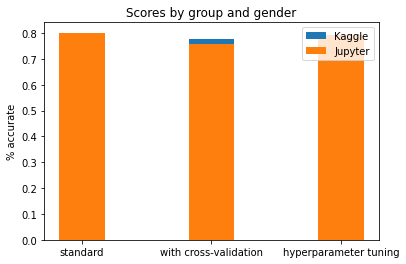

[0.8014354066985646, 0.7583732057416268, 0.7942583732057417]
[0.78708, 0.77751, 0.78947]


In [441]:
import matplotlib.pyplot as plt


labels = ["standard", "with cross-validation", "hyperparameter tuning"]
jupyter = [RFC_points, RFC_CV_points, RFC_HT_points]
kaggle = [K_RFC_points, K_RFC_CV_points, K_RFC_HT_points]
width = 0.35  # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, kaggle, width,label='Kaggle')

ax.bar(labels, jupyter, width,label='Jupyter')


ax.set_ylabel('% accurate')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()
print(jupyter)
print(kaggle)

Support Vector Machines Graph

In [ ]:
prob_modelos = [SVM_points
print(prob_modelos)

fig, ax = plt.subplots()
plt.bar((range(3)),prob_modelos,color="#8A2BE2")
modelos = ("RFC", "RFC_CV", "RFC_HT" "SVM", "LR")
x_pos = np.arange(len(modelos))
ax.set_xticks(x_pos, labels=modelos)
ax.set_xlabel('MODELOS')
fig.set_size_inches(10, 6)
plt.show()

# APUNTES

In [ ]:
#que se vayan generando graficas diferentes y sin fijar random state
#hacer una grafica de las graficas (que modelo tiene los picos mas altos, mas bajos, mas media.

In [ ]:
pip install jupyter_contrib_nbextensions

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

In [177]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=36,leaf_size=13,p=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [178]:
exito(pred,y_pred)

(0.631578947368421, 264)

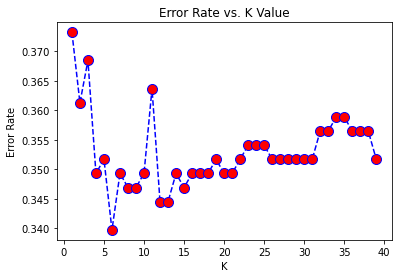

In [171]:
k_error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    k_error_rate.append(np.mean(pred_i != y_test))
#plt.figure(figsize=(10,8))
plt.plot(range(1,40),k_error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.savefig("figure.png")

# K-NEIGHBOURS


In [209]:
knn = KNeighborsClassifier()
#Create x and y variables.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
#Split data into training and testing.
#Training the model.
knn.fit(X_train, y_train)
#Predict test data set.
y_pred = knn.predict(X_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.66      0.91      0.77       266
           1       0.55      0.18      0.28       152

    accuracy                           0.65       418
   macro avg       0.61      0.55      0.52       418
weighted avg       0.62      0.65      0.59       418



0.5488721804511277

In [241]:
leaf_size = [10,20,30,40,50]
n_neighbors = [5,10,20,40]

#Convert to dictionary
hyperparameters = [{
    'leaf_size': ['leaf_size'],
    'n_neighbors': ['n_neighbors'],
             }]


#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
#print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
#print('Best p:', best_model.best_estimator_.get_params()['p'])
#print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

C:\Users\Cosas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Cosas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Cosas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "C:\Users\Cosas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklea

TypeError: '>=' not supported between instances of 'str' and 'int'

In [220]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [212]:
2+2

4

# MultiLayer Perceptron

In [184]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier
MLP = MLPClassifier(random_state=0, max_iter=600).fit(X_train, y_train)
prediction = MLP.predict(X_test)


In [444]:
MLP_GSC = MLPClassifier(random_state=0, max_iter=600, activation = 'tanh', alpha = 0.0001, hidden_layer_sizes = (20,), 
                        learning_rate = 'constant', solver = 'adam')
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
MLP_GSC = GridSearchCV(MLP_GSC, parameter_space, n_jobs=-1, cv=5)
MLP_GSC.fit(X_train, y_train) # X is train samples and y is the corresponding labels
acc_MLP_GSC = round(MLP_GSC.score(X_train, y_train) * 100, 2)
print(acc_MLP_GSC,MLP_GSC.best_params_)



80.76 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}


In [197]:
exito(predictionMLP, y_test)

(0.8301435406698564, 347)

In [198]:
predictionMLP = MLP_GSC.predict(X_test)

exito(predictionMLP, y_test)
submission_generator(predictionMLP, '_MLP')